In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

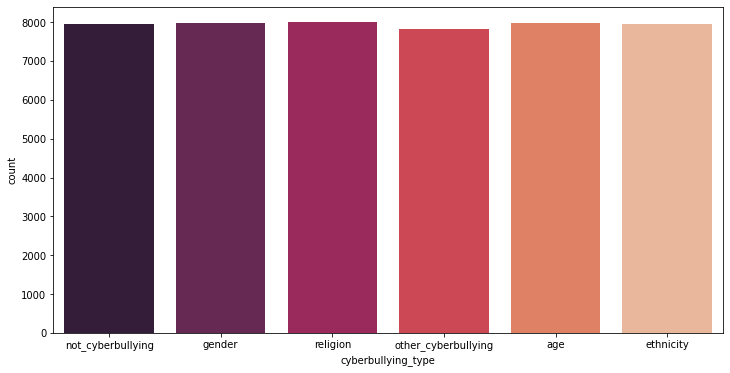

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='cyberbullying_type',data = df,palette = 'rocket')
plt.show()

In [ ]:
category = pd.get_dummies(df.cyberbullying_type)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='cyberbullying_type')
df_baru

,tweet_text,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
0,"In other words #katandandre, your food was cra...",0,0,0,1,0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,0,0,1,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0,0,0,1,0,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,0,0,1,0,0
4,@RudhoeEnglish This is an ISIS account pretend...,0,0,0,1,0,0
...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",0,1,0,0,0,0
47688,Turner did not withhold his disappointment. Tu...,0,1,0,0,0,0
47689,I swear to God. This dumb nigger bitch. I have...,0,1,0,0,0,0
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,0,1,0,0,0,0


In [ ]:
kata = df_baru['tweet_text'].values
label = df_baru[['age', 'ethnicity', 'gender', 'not_cyberbullying', 'other_cyberbullying', 'religion']].values

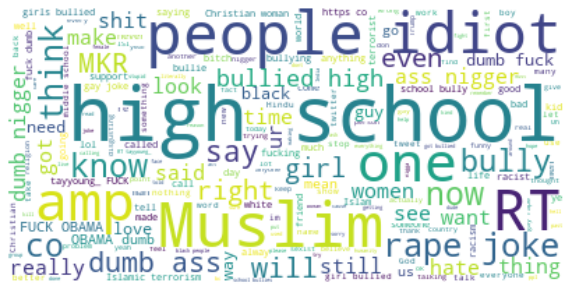

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in df.tweet_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
kata_latih, kata_test, label_latih, label_test = train_test_split(kata, label, test_size=0.2)
print(kata_latih.shape, label_latih.shape)
print(kata_test.shape, label_test.shape)

(38153,) (38153, 6)
(9539,) (9539, 6)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=30000, oov_token='x')
tokenizer.fit_on_texts(kata_latih) 
tokenizer.fit_on_texts(kata_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kata_latih)
sekuens_test = tokenizer.texts_to_sequences(kata_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=30000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\n Accuracy has exceeded>90%!")
      self.model.stop_training = True
callbacks = myCallback()


In [ ]:
hist = model.fit(padded_latih, label_latih, validation_data=(padded_test, label_test), epochs=10, callbacks=[callbacks], verbose=2) 

Epoch 1/10
1193/1193 - 493s - loss: 0.3395 - accuracy: 0.8581 - val_loss: 0.4860 - val_accuracy: 0.8051 - 493s/epoch - 413ms/step
Epoch 2/10
1193/1193 - 491s - loss: 0.2925 - accuracy: 0.8859 - val_loss: 0.4949 - val_accuracy: 0.8215 - 491s/epoch - 411ms/step
Epoch 3/10

 Accuracy has exceeded>90%!
1193/1193 - 491s - loss: 0.2616 - accuracy: 0.9007 - val_loss: 0.5093 - val_accuracy: 0.8181 - 491s/epoch - 411ms/step


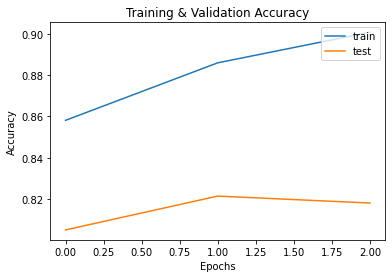

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()